In [2]:
import os
import time
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam,Nadam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# Necessary import statements

# GO THROUGH AND RERUN EVERYTHING. AND PUT THE RESULTS IN THE EXPERIMENT SECTIONS. 


In [4]:
(X_train_entire, y_train_entire), (X_test_entire, y_test_entire)= tf.keras.datasets.cifar10.load_data()
# This loads our CIFAR Data into the corresponding X and y train


170500096/170498071 [==============================] - 2s 0us/step


# Data Preprocessing
Here we will process the data as required. Since these are colored images we will only divide the images by 255. This ensures that the output will be in the range of [0,1]. Additionally, this will break the training dataset into the validation set as well. 


In [5]:
X_train_entire = X_train_entire/255.0
X_test_entire = X_test_entire/255.0
# This normalizes our dividing all images by 255 and converting them to floats. This makes the output from the 
# Neural Network Model easier to understand
print(X_train_entire[0][1])
X_train, X_valid = X_train_entire[:-10000], X_train_entire[-10000:]
y_train, y_valid = y_train_entire[:-10000], y_train_entire[-10000:]
# This says that of the 50000 training examples we want to use 40000 for training and
# The other 10000 for validating


[[0.0627451  0.07843137 0.07843137]
 [0.         0.         0.        ]
 [0.07058824 0.03137255 0.        ]
 [0.2        0.10588235 0.03137255]
 [0.34509804 0.2        0.08235294]
 [0.47058824 0.32156863 0.16862745]
 [0.50196078 0.34901961 0.17647059]
 [0.49803922 0.3372549  0.17254902]
 [0.49411765 0.34117647 0.19607843]
 [0.45490196 0.30980392 0.17254902]
 [0.41568627 0.2745098  0.14509804]
 [0.39607843 0.2627451  0.1372549 ]
 [0.41176471 0.2745098  0.14117647]
 [0.44313725 0.29019608 0.1372549 ]
 [0.42745098 0.2745098  0.12941176]
 [0.43921569 0.28235294 0.14509804]
 [0.46666667 0.30980392 0.17254902]
 [0.42745098 0.27843137 0.12941176]
 [0.41176471 0.27058824 0.10588235]
 [0.49019608 0.34901961 0.18039216]
 [0.49803922 0.36078431 0.18039216]
 [0.47843137 0.33333333 0.15294118]
 [0.51372549 0.34901961 0.18431373]
 [0.48627451 0.32156863 0.16078431]
 [0.4745098  0.30980392 0.14509804]
 [0.51372549 0.34901961 0.18823529]
 [0.51764706 0.35686275 0.20784314]
 [0.52156863 0.36862745 0.22

# Data Visualization
Here we will visuaize some of the data. We will count how many times each of our categories occurs in the initial train and test data, display an image which is the processed version of the one above, and display the shape of our training array.  



Shape of training set is:  (50000, 32, 32, 3)


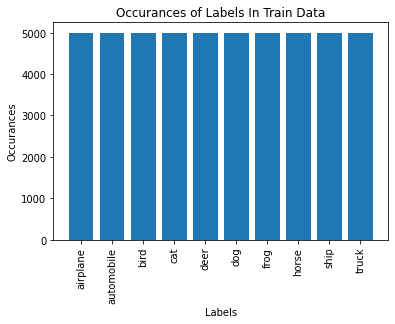

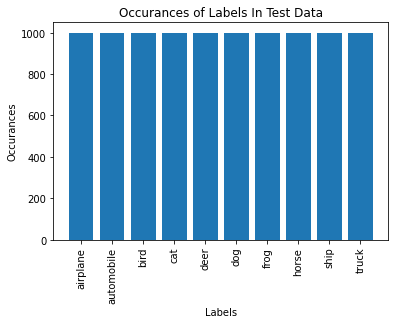

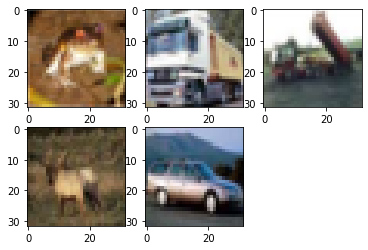

In [12]:
classifications_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
classifications=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# By Inspection I know that the order of the class names is the same as their corresponding category
# IN other words, airplane is category 0 and truck is category 

# I created a dictionary and a list to make data visualization easier
labels_train, occurances_train = np.unique(y_train_entire,return_counts=True)
labels_test, occurances_test = np.unique(y_test_entire, return_counts=True)
# These count how many times each label occurs in the train and test data. 

print("Shape of training set is: ", X_train_entire.shape)
training_categories_graphs =[classifications_dict[x] for x in labels_train]
testing_Categories_graphs = [classifications_dict[y] for y in labels_test]
# These two in place loops create the words for each category so that we can display category names not numbers

plt.bar(training_categories_graphs, occurances_train)
plt.title('Occurances of Labels In Train Data')
plt.xlabel('Labels')
plt.ylabel('Occurances')
plt.xticks(training_categories_graphs,rotation='vertical')
plt.show()

plt.bar(classifications, occurances_test)
plt.title('Occurances of Labels In Test Data')
plt.xlabel('Labels')
plt.ylabel('Occurances')
plt.xticks(labels_test,rotation ='vertical')
plt.show()
#The above two segments of code plot the number of occurances of each category
#In the test and train data sets

for i in range(0,5):
    plt.subplot(230 + 1 + i)
    plt.imshow(X_train_entire[i])
   
  
plt.show()

#The  for loop allows us to see what some of the images are. 


#Model Training
Here we will set up and compare different  models to gain further insight into how CNN's work. One model, called model A, will have a low number of layers and a low number of neurons per layer, while  another model, called model B, will be an MLP. Due to the difference in architecture, I expect model A to perform significantly better than model B. Using the insights gained from these two initial models, I will iteratively change my model until i recieve the best values possible. This includes but is not limited to adding pooling layers, increasing the number of layers,adding dropout layers, and changing hyperparameters such as the number of epochs or the loss function. 


In [6]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model_A = keras.models.Sequential([
        keras.layers.Conv2D(32, kernel_size = (3,3),input_shape =[32,32,3] ,padding='same'),
        keras.layers.Activation('relu'),
          
        keras.layers.Conv2D(64, kernel_size = (3,3)),
        keras.layers.Activation('relu'),

        keras.layers.Conv2D(128, kernel_size = (3,3)),
        keras.layers.Activation('relu'),
        
        keras.layers.Flatten(),
    
      
        keras.layers.Dense(32),
        keras.layers.Activation('relu'),
    
        keras.layers.Dense(10, activation = 'softmax')    
        ])
# This model has 3 convolutional layers followed by one Dense Layer then the output layer
# This model is expected to perform poorly

model_A.summary()
model_A.compile(loss="sparse_categorical_crossentropy",optimizer ="nadam",metrics=["accuracy"])
start_time = time.time()
history_A = model_A.fit(X_train,y_train, epochs=10, validation_data=(X_valid, y_valid))
score_A = model_A.evaluate(X_test_entire, y_test_entire)
A_Time = (time.time() - start_time)/60

print("\n Training Time:", (time.time() - start_time)/60, "minutes")
print(score_A)
#This fits and scores the model we created earlier.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

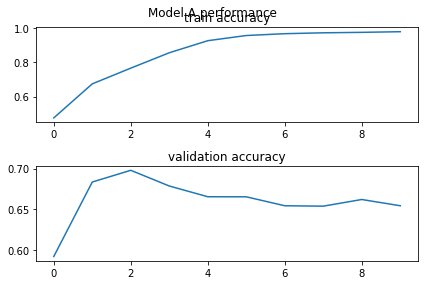

In [ ]:
fig_A, (ax1_A, ax2_A) = plt.subplots(2)
fig_A.suptitle('Model A performance')
ax1_A.plot( history_A.history['accuracy'])
ax1_A.set_title('train accuracy')
ax2_A.plot( history_A.history['val_accuracy'])
ax2_A.set_title('validation accuracy')
fig_A.tight_layout()

As Expected this network is performs somewhat decent. It seems to be overfitting as the training accuracy is nearly 100%, however, the test accuracy is substantially lower sitting at 65%. I attribute this issue to the model not having any pooling layers,a large number of trainable parameters and no regularization techniques. 


In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model_B = keras.models.Sequential([
          keras.layers.Flatten(input_shape=[32,32,3]),
          keras.layers.Dense(300,activation ='relu'),
          keras.layers.Dense(200,activation ='relu'),
          keras.layers.Dense(100,activation ='relu'),
          keras.layers.Dense(10,activation ='softmax'),
        ])
# This model is a regular MLP. It contains no convoloutional layers and only dense layers. 
model_B.summary()
model_B.compile(loss="sparse_categorical_crossentropy", optimizer ="nadam",metrics=["accuracy"])
start_time = time.time()
history_B = model_B.fit(X_train,y_train, epochs=10, validation_data=(X_valid, y_valid))
score_B = model_B.evaluate(X_test_entire, y_test_entire)
print(score_B)
B_Time = (time.time() - start_time)/60
print("\n Training Time:", (time.time() - start_time)/60, "minutes")



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               921900    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 1,003,210
Trainable params: 1,003,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0223 - accuracy: 0.2596 - val_loss

As expected, this model performed quite poorly. Since it is just an MLP with 3 hidden layers and 1 output layer, it doesn't learn any special features as in the initial model A it contained convolutional layers and a dense layer

Next, I will train a Convolutional Neural Network again, however, there will be some drastict changes between this one and Model A. First, this new model, called model C, will have 1 more convolutional layers. The increase in convolutional layers allows the model to learn more complex features in the data. Secondly, there will be an increase in the amount of dense layers. Adding more dense layers allows the model to learn more complex relationships between the learned features. The sizes of the layers layer will also be increased to enhance feature and relationship extraction. Additionally, there will be more pooling layers to attempt to increase the speed of the networks training. This should increase the models performance on the data set. 

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model_C = keras.models.Sequential([
        keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = [32,32,3]),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool2D(2,2),
       
          
        keras.layers.Conv2D(128, kernel_size = (3,3),padding='same'),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool2D(2,2),
        
        keras.layers.Conv2D(256, kernel_size = (3,3),padding='same'),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool2D(2,2),
        
        
        keras.layers.Conv2D(512, kernel_size = (3,3),padding ='same'),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool2D(2,2),
        
        keras.layers.Flatten(),
        keras.layers.Dense(512),
        keras.layers.Activation('relu'),
        keras.layers.Dense(128),
        keras.layers.Activation('relu'),
        keras.layers.Dense(32),
        keras.layers.Activation('relu'),
        keras.layers.Dense(10, activation = 'softmax')    
        ])
# This model has 4 convolutional layers followed by 3 Dense Layer and an output layer 
# This model is expected to perform poorly

model_C.summary()
model_C.compile(loss="sparse_categorical_crossentropy",optimizer ="nadam",metrics=["accuracy"])
start_time = time.time()
history_C = model_C.fit(X_train,y_train, epochs=10, validation_data=(X_valid, y_valid))
score_C = model_C.evaluate(X_test_entire, y_test_entire)
print(score_C)
C_Time = (time.time() - start_time)/60
print("\n Training Time:", (time.time() - start_time)/60, "minutes")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 128)       36992     
_________________________________________________________________
activation_1 (Activation)    (None, 15, 15, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         2

Model C performed quite a bit better than A. Model C achieved a test loss of 1.1 and a test accuracy of 73%, while overfitting.  

Now that its confirmed the pooling layers, and increase in number of convolutional and training layers increase model performance, it's time to test the next hypothesis. I believe that adding dropout layers network will increase performance as overfitting is  reduced. Additionally, batch normalization layers are added to increase robustness which also helps with overfitting. 

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model_D = keras.models.Sequential([
        keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = [32,32,3]),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool2D(2,2),
       
          
        keras.layers.Conv2D(128, kernel_size = (3,3),padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool2D(2,2),
        
        keras.layers.Conv2D(256, kernel_size = (3,3),padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool2D(2,2),
        
        
        keras.layers.Conv2D(512, kernel_size = (3,3),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Dropout(0.2),
        
        keras.layers.Flatten(),
        keras.layers.Dense(512),
        keras.layers.Activation('relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128),
        keras.layers.Activation('relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32),
        keras.layers.Activation('relu'),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(10, activation = 'softmax')    
        ])

model_D.summary()
model_D.compile(loss="sparse_categorical_crossentropy",optimizer ="nadam",metrics=["accuracy"])
start_time = time.time()
history_D = model_D.fit(X_train,y_train, epochs=10,  validation_data=(X_valid, y_valid))
score_D = model_D.evaluate(X_test_entire, y_test_entire)
print(score_D)
D_Time = (time.time() - start_time)/60
print("\n Training Time:", (time.time() - start_time)/60, "minutes")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 128)       36992     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 15, 15, 128)       0

As I hypothesized the model performance improved compared to that of the previous iteration. The test accuracy slightly increased to 74% while the test loss dropped around 0.15 points, and it reduced overfitting.  The architecture of the model is pretty much finalized, however, I may tweak things if i see it to be necessary finalized. 

  

In order to further optimize the model I will update some hyperparameters in a similar iterative method to the one employed for the network architecture. 

First, I will increase the number of epochs. Increasing the number of epochs allows the model to train for longer and I believe it will lead to better weights, increasing the model performance. Adhjusting the hyper parameters such as batch size affect the time taken to train, whereas the adjusting the loss function and the optimizer function affect the model output.

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model_E = keras.models.Sequential([
        keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = (32,32,3),padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool2D(2,2),
          
        keras.layers.Conv2D(128, kernel_size = (3,3),padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool2D(2,2),
        
        keras.layers.Conv2D(256, kernel_size = (3,3),padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool2D(2,2),
        
        keras.layers.Conv2D(512, kernel_size = (3,3),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Dropout(0.2),
        
        keras.layers.Flatten(),
        keras.layers.Dense(512),
        keras.layers.Activation('relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128),
        keras.layers.Activation('relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32),
        keras.layers.Activation('relu'),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(10, activation = 'softmax')    
        ])



model_E.summary()
model_E.compile(loss="sparse_categorical_crossentropy",optimizer ="nadam",metrics=["accuracy"])
start_time = time.time()
history_E = model_E.fit(X_train,y_train, epochs=20, validation_data=(X_valid, y_valid))
score_E = model_E.evaluate(X_test_entire, y_test_entire)
print(score_E)
E_Time = (time.time() - start_time)/60
print("\n Training Time:", (time.time() - start_time)/60, "minutes")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 128)       0

Increasing the number of epochs to 20 increased the test accuracy 5% to 79, however, it caused an increase to the training time which is expected. It also recreated the severe overfitting problem as the training accuracies are now nearly 100% again. It also slightly reduced the test loss. 



To try and increase accuracy a batch size parameter is added. The batch size should also add some robustness to prevent over fitting, although this will increase the training time. 

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model_F = keras.models.Sequential([
        keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = (32,32,3),padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool2D(2,2),
          
        keras.layers.Conv2D(128, kernel_size = (3,3),padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool2D(2,2),
        
        keras.layers.Conv2D(256, kernel_size = (3,3),padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool2D(2,2),
        
        keras.layers.Conv2D(512, kernel_size = (3,3),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Dropout(0.2),
        
        keras.layers.Flatten(),
        keras.layers.Dense(512),
        keras.layers.Activation('relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128),
        keras.layers.Activation('relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32),
        keras.layers.Activation('relu'),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(10, activation = 'softmax')    
        ])

model_F.summary()
model_F.compile(loss="sparse_categorical_crossentropy",optimizer ="nadam",metrics=["accuracy"])
start_time = time.time()
history_F = model_F.fit(X_train, y_train, batch_size = 16 ,epochs=20, validation_data=(X_valid, y_valid))
score_F = model_F.evaluate(X_test_entire, y_test_entire)
print(score_F)
F_Time = (time.time() - start_time)/60
print("\n Training Time:", (time.time() - start_time)/60, "minutes")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 128)       0

Adding the batch size parameter caused a slight drop in the test accuracy and also caused over a 3 minute increase in training time when comparing it to model E. However, there was a  small decrease in how much the model overfitted the data. . The loss slightly increased as well


Next I will add  a decaying learning rate. This will require me to manually rewrite some code for the optimizer. Additionally i initialized the learning rate to be large. I will need to change the optimizer function as well since Nadam cannot accept it. 

In [ ]:

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model_G = keras.models.Sequential()
model_G.add(keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = (32,32,3),padding='same'))
model_G.add(keras.layers.BatchNormalization())
model_G.add(keras.layers.Activation('relu'))
model_G.add(keras.layers.MaxPool2D(2,2))
          
model_G.add(keras.layers.Conv2D(128, kernel_size = (3,3),padding='same'))
model_G.add(keras.layers.BatchNormalization())
model_G.add(keras.layers.Activation('relu'))
model_G.add(keras.layers.MaxPool2D(2,2))
        
model_G.add(keras.layers.Conv2D(256, kernel_size = (3,3),padding='same'))
model_G.add(keras.layers.BatchNormalization())
model_G.add(keras.layers.Activation('relu'))
model_G.add(keras.layers.MaxPool2D(2,2))
        
model_G.add(keras.layers.Conv2D(512, kernel_size = (3,3),padding ='same'))
model_G.add(keras.layers.BatchNormalization())
model_G.add(keras.layers.Activation('relu'))
model_G.add(keras.layers.MaxPool2D(2,2))
model_G.add(keras.layers.Dropout(0.2))
        
model_G.add(keras.layers.Flatten())
model_G.add(keras.layers.Dense(512))
model_G.add(keras.layers.Activation('relu'))
model_G.add(keras.layers.Dropout(0.2))
model_G.add(keras.layers.Dense(128))
model_G.add(keras.layers.Activation('relu'))
model_G.add(keras.layers.Dropout(0.2))
model_G.add(keras.layers.Dense(32))
model_G.add(keras.layers.Activation('relu'))
model_G.add(keras.layers.Dropout(0.2))
model_G.add(keras.layers.BatchNormalization())
model_G.add(keras.layers.Dense(10, activation = 'softmax')) 
model_G.summary()

opt = Nadam(lr=0.001, decay=1e-6)
model_G.compile(loss="sparse_categorical_crossentropy",optimizer =opt,metrics=["accuracy"])
start_time = time.time()
history_G = model_G.fit(X_train, y_train, batch_size = 16 ,epochs=20, validation_data=(X_valid, y_valid))
score_G = model_G.evaluate(X_test_entire, y_test_entire)
print(score_G)
G_Time = (time.time() - start_time)/60
print("\n Training Time:", (time.time() - start_time)/60, "minutes")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 128)       0

Adding the decaying learning rate had nearly no affect on the training speed or performance of the model. It only very slightly increased the test loss. 

I will add a regularization term to the  dense layers to try and reduce overfitting even more, and hope that it also increases the accuracy of the model. Since the decaying learning rate did not affect the model, i will not use it in the next model, but may add it again after.  

In [ ]:

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model_Z = keras.models.Sequential()
model_Z.add(keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = (32,32,3),padding='same'))
model_Z.add(keras.layers.BatchNormalization())
model_Z.add(keras.layers.Activation('relu'))
model_Z.add(keras.layers.MaxPool2D(2,2))
          
model_Z.add(keras.layers.Conv2D(128, kernel_size = (3,3),padding='same'))
model_Z.add(keras.layers.BatchNormalization())
model_Z.add(keras.layers.Activation('relu'))
model_Z.add(keras.layers.MaxPool2D(2,2))
        
model_Z.add(keras.layers.Conv2D(256, kernel_size = (3,3),padding='same'))
model_Z.add(keras.layers.BatchNormalization())
model_Z.add(keras.layers.Activation('relu'))
model_Z.add(keras.layers.MaxPool2D(2,2))
        
model_Z.add(keras.layers.Conv2D(512, kernel_size = (3,3),padding ='same'))
model_Z.add(keras.layers.BatchNormalization())
model_Z.add(keras.layers.Activation('relu'))
model_Z.add(keras.layers.MaxPool2D(2,2))
model_Z.add(keras.layers.Dropout(0.2))
        
model_Z.add(keras.layers.Flatten())
model_Z.add(keras.layers.Dense(512, kernel_regularizer='l2'))
model_Z.add(keras.layers.Activation('relu'))
model_Z.add(keras.layers.Dropout(0.2))
model_Z.add(keras.layers.Dense(128,kernel_regularizer='l2'))
model_Z.add(keras.layers.Activation('relu'))
model_Z.add(keras.layers.Dropout(0.2))
model_Z.add(keras.layers.Dense(32,kernel_regularizer='l2'))
model_Z.add(keras.layers.Activation('relu'))
model_Z.add(keras.layers.Dropout(0.2))
model_Z.add(keras.layers.BatchNormalization())
model_Z.add(keras.layers.Dense(10, activation = 'softmax', kernel_regularizer='l2')) 
model_Z.summary()


model_Z.compile(loss="sparse_categorical_crossentropy",optimizer ='nadam',metrics=["accuracy"])
start_time = time.time()
history_Z = model_Z.fit(X_train, y_train, batch_size = 16 ,epochs=20, validation_data=(X_valid, y_valid))
score_Z = model_Z.evaluate(X_test_entire, y_test_entire)
print(score_Z)
Z_Time = (time.time() - start_time)/60
print("\n Training Time:", (time.time() - start_time)/60, "minutes")

#I named hte model Z as a manual reading checkpoint. This prevented me from 
#Rewriting the sme letter again.  
# The alphabet incase i made another naming mistake. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 128)       0

The regularization had a positive effect on the overfitting while slightly decreasing the test accuracy. Although it did  increase the test loss, as well as slightly increase the time to train,  I consider this an improvement to the previous model. 

In order to further prevent overfitting and long training times, I will add eary stopping to the model and use the validation accuracy as its metric. I will stop if there is no change for 3 epochs and restore the best weights to those of the best model before stopping occurs. The model will stop if the validation accuracy does not increase by half a percent for 3 epochs. 

In [ ]:

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model_H = keras.models.Sequential()
model_H.add(keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = (32,32,3),padding='same'))
model_H.add(keras.layers.BatchNormalization())
model_H.add(keras.layers.Activation('relu'))
model_H.add(keras.layers.MaxPool2D(2,2))
          
model_H.add(keras.layers.Conv2D(128, kernel_size = (3,3),padding='same'))
model_H.add(keras.layers.BatchNormalization())
model_H.add(keras.layers.Activation('relu'))
model_H.add(keras.layers.MaxPool2D(2,2))
        
model_H.add(keras.layers.Conv2D(256, kernel_size = (3,3),padding='same'))
model_H.add(keras.layers.BatchNormalization())
model_H.add(keras.layers.Activation('relu'))
model_H.add(keras.layers.MaxPool2D(2,2))
        
model_H.add(keras.layers.Conv2D(512, kernel_size = (3,3),padding ='same'))
model_H.add(keras.layers.BatchNormalization())
model_H.add(keras.layers.Activation('relu'))
model_H.add(keras.layers.MaxPool2D(2,2))
model_H.add(keras.layers.Dropout(0.2))
        
model_H.add(keras.layers.Flatten())
model_H.add(keras.layers.Dense(512, kernel_regularizer='l2'))
model_H.add(keras.layers.Activation('relu'))
model_H.add(keras.layers.Dropout(0.2))
model_H.add(keras.layers.Dense(128,kernel_regularizer='l2'))
model_H.add(keras.layers.Activation('relu'))
model_H.add(keras.layers.Dropout(0.2))
model_H.add(keras.layers.Dense(32,kernel_regularizer='l2'))
model_H.add(keras.layers.Activation('relu'))
model_H.add(keras.layers.Dropout(0.2))
model_H.add(keras.layers.BatchNormalization())
model_H.add(keras.layers.Dense(10, activation = 'softmax', kernel_regularizer='l2')) 
model_H.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True, min_delta=0.005)
# This creates the callback to stop the training


model_H.compile(loss="sparse_categorical_crossentropy",optimizer ='nadam',metrics=["accuracy"])
start_time = time.time()
history_ = model_H.fit(X_train, y_train, batch_size = 16 ,epochs=20, validation_data=(X_valid, y_valid),callbacks = [callback])
score_H = model_H.evaluate(X_test_entire, y_test_entire)
print(score_H)
H_Time = (time.time() - start_time)/60
print("\n Training Time:", (time.time() - start_time)/60, "minutes")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 128)       0

We can see that the early stopping caused the training to end after 13 epochs. The testing accuracy slightly dropped to 77% (from 78) , however, the test loss decreased along with the amount of overfitting. 


The last hyper parameter I am going to change is the optimization method. I have been using Nadam since it is quite common to see, however, as per this paper, Adam performed the best. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7407771/. Due to this, I will try with adam. 

In [8]:

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model_I = keras.models.Sequential()
model_I.add(keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = (32,32,3),padding='same'))
model_I.add(keras.layers.BatchNormalization())
model_I.add(keras.layers.Activation('relu'))
model_I.add(keras.layers.MaxPool2D(2,2))
          
model_I.add(keras.layers.Conv2D(128, kernel_size = (3,3),padding='same'))
model_I.add(keras.layers.BatchNormalization())
model_I.add(keras.layers.Activation('relu'))
model_I.add(keras.layers.MaxPool2D(2,2))
        
model_I.add(keras.layers.Conv2D(256, kernel_size = (3,3),padding='same'))
model_I.add(keras.layers.BatchNormalization())
model_I.add(keras.layers.Activation('relu'))
model_I.add(keras.layers.MaxPool2D(2,2))
        
model_I.add(keras.layers.Conv2D(512, kernel_size = (3,3),padding ='same'))
model_I.add(keras.layers.BatchNormalization())
model_I.add(keras.layers.Activation('relu'))
model_I.add(keras.layers.MaxPool2D(2,2))
model_I.add(keras.layers.Dropout(0.2))
        
model_I.add(keras.layers.Flatten())
model_I.add(keras.layers.Dense(512, kernel_regularizer='l2'))
model_I.add(keras.layers.Activation('relu'))
model_I.add(keras.layers.Dropout(0.2))
model_I.add(keras.layers.Dense(128,kernel_regularizer='l2'))
model_I.add(keras.layers.Activation('relu'))
model_I.add(keras.layers.Dropout(0.2))
model_I.add(keras.layers.Dense(32,kernel_regularizer='l2'))
model_I.add(keras.layers.Activation('relu'))
model_I.add(keras.layers.Dropout(0.2))
model_I.add(keras.layers.BatchNormalization())
model_I.add(keras.layers.Dense(10, activation = 'softmax', kernel_regularizer='l2')) 
model_I.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True, min_delta=0.005)
# This creates the callback to stop the training


model_I.compile(loss="sparse_categorical_crossentropy",optimizer ='adam',metrics=["accuracy"])
start_time = time.time()
history_I = model_I.fit(X_train, y_train, batch_size = 16 ,epochs=20, validation_data=(X_valid, y_valid),callbacks = [callback])
score_I = model_I.evaluate(X_test_entire, y_test_entire)
print(score_I)
I_Time = (time.time() - start_time)/60
print("\n Training Time:", (time.time() - start_time)/60, "minutes")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 128)       0

The training finished two epochs later than in the last test, however, the total training time was reduced. The test accuracy increased to 78% and keeping the test loss nearly the same. Additionally, it decreased the amount of overfitting as well. Best so far since balance between time, accuracy, and overfitting. 

This demonstreates Adam is better, and as a result I will use it from now on, and add a decaying learning rate as i belive this will allow the model to be more accurate as it slowly updates the weights near the end. 

In [10]:

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model_J = keras.models.Sequential()
model_J.add(keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = (32,32,3),padding='same'))
model_J.add(keras.layers.BatchNormalization())
model_J.add(keras.layers.Activation('relu'))
model_J.add(keras.layers.MaxPool2D(2,2))
          
model_J.add(keras.layers.Conv2D(128, kernel_size = (3,3),padding='same'))
model_J.add(keras.layers.BatchNormalization())
model_J.add(keras.layers.Activation('relu'))
model_J.add(keras.layers.MaxPool2D(2,2))
        
model_J.add(keras.layers.Conv2D(256, kernel_size = (3,3),padding='same'))
model_J.add(keras.layers.BatchNormalization())
model_J.add(keras.layers.Activation('relu'))
model_J.add(keras.layers.MaxPool2D(2,2))
        
model_J.add(keras.layers.Conv2D(512, kernel_size = (3,3),padding ='same'))
model_J.add(keras.layers.BatchNormalization())
model_J.add(keras.layers.Activation('relu'))
model_J.add(keras.layers.MaxPool2D(2,2))
model_J.add(keras.layers.Dropout(0.2))
        
model_J.add(keras.layers.Flatten())
model_J.add(keras.layers.Dense(512, kernel_regularizer='l2'))
model_J.add(keras.layers.Activation('relu'))
model_J.add(keras.layers.Dropout(0.2))
model_J.add(keras.layers.Dense(128,kernel_regularizer='l2'))
model_J.add(keras.layers.Activation('relu'))
model_J.add(keras.layers.Dropout(0.2))
model_J.add(keras.layers.Dense(32,kernel_regularizer='l2'))
model_J.add(keras.layers.Activation('relu'))
model_J.add(keras.layers.Dropout(0.2))
model_J.add(keras.layers.BatchNormalization())
model_J.add(keras.layers.Dense(10, activation = 'softmax', kernel_regularizer='l2')) 
model_J.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True, min_delta=0.005)
# This creates the callback to stop the training

opt = Adam(lr=0.001, decay=1e-6)
model_J.compile(loss="sparse_categorical_crossentropy",optimizer =opt,metrics=["accuracy"])
start_time = time.time()
history_J = model_J.fit(X_train, y_train, batch_size = 16 ,epochs=20, validation_data=(X_valid, y_valid),callbacks = [callback])
score_J = model_J.evaluate(X_test_entire, y_test_entire)
print(score_J)
print("\n Training Time:", (time.time() - start_time)/60, "minutes")
J_Time = (time.time() - start_time)/60

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 128)       0

Best so far. 79% test accuracy and small decrease to test loss. Similar levels of overfitting. Thast why best so far. 

I have now chnaged multiple hyper parameters as well as tried to optimize the layer sizes. THe accuracy is just under 80% which is decent, but I believe it could be better. One idea I have left is to increase the dropout weight associated with each layer as we move deeper into the network (https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/). I expect this to increase the training time as well. 
I have more trainable parameters in my model than example models I have seen, however, I am not achieving accuracies above 80.



I DIDNT SHUFFLE BECAUSE THIS DATA IS ALREADY SHUFFLED. 

In [6]:
tf.random.set_seed(42)
np.random.seed(42)
model_K = keras.models.Sequential()
model_K.add(keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = (32,32,3),padding='same'))
model_K.add(keras.layers.BatchNormalization())
model_K.add(keras.layers.Activation('relu'))
model_K.add(keras.layers.MaxPool2D(2,2))
          
model_K.add(keras.layers.Conv2D(128, kernel_size = (3,3),padding='same'))
model_K.add(keras.layers.BatchNormalization())
model_K.add(keras.layers.Activation('relu'))
model_K.add(keras.layers.MaxPool2D(2,2))
        
model_K.add(keras.layers.Conv2D(256, kernel_size = (3,3),padding='same'))
model_K.add(keras.layers.BatchNormalization())
model_K.add(keras.layers.Activation('relu'))
model_K.add(keras.layers.MaxPool2D(2,2))
       
model_K.add(keras.layers.Conv2D(512, kernel_size = (3,3),padding ='same'))
model_K.add(keras.layers.BatchNormalization())
model_K.add(keras.layers.Activation('relu'))
model_K.add(keras.layers.MaxPool2D(2,2))
model_K.add(keras.layers.Dropout(0.2))
        
model_K.add(keras.layers.Flatten())
model_K.add(keras.layers.Dense(512, kernel_regularizer='l2'))
model_K.add(keras.layers.Activation('relu'))
model_K.add(keras.layers.Dropout(0.25))
model_K.add(keras.layers.Dense(128,kernel_regularizer='l2'))
model_K.add(keras.layers.Activation('relu'))
model_K.add(keras.layers.Dropout(0.3))
model_K.add(keras.layers.Dense(32,kernel_regularizer='l2'))
model_K.add(keras.layers.Activation('relu'))
model_K.add(keras.layers.Dropout(0.35))
model_K.add(keras.layers.BatchNormalization())
model_K.add(keras.layers.Dense(10, activation = 'softmax', kernel_regularizer='l2')) 
model_K.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True, min_delta=0.005)
# This creates the callback to stop the training

opt = Adam(lr=0.001, decay=1e-6)
model_K.compile(loss="sparse_categorical_crossentropy",optimizer =opt,metrics=["accuracy"])
start_time = time.time()
history_K = model_K.fit(X_train, y_train, batch_size = 16 ,epochs=20, validation_data=(X_valid, y_valid),callbacks = [callback])
score_K = model_K.evaluate(X_test_entire, y_test_entire)
print(score_K)
K_Time = (time.time() - start_time)/60
print("\n Training Time:", (time.time() - start_time)/60, "minutes")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
activation_5 (Activation)    (None, 16, 16, 128)      

Adding the increasing dropout weight through the layers had a somewhat positive affect by severely reducing over fitting, while affecting the test accuracy. However, it did cause nearly a 5 minute increase in training time.
I will now augment the data to create more training examples to attempt and increase the robustness of the model so far. Didnt think I would need to augment as others ones didnt and the data set is quite large as it is. 

This requires me to update the code slightly, espcially  in the model. fit function. 


In [23]:

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model_L = keras.models.Sequential()
model_L.add(keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = (32,32,3),padding='same'))
model_L.add(keras.layers.BatchNormalization())
model_L.add(keras.layers.Activation('relu'))
model_L.add(keras.layers.MaxPool2D(2,2))
          
model_L.add(keras.layers.Conv2D(128, kernel_size = (3,3),padding='same'))
model_L.add(keras.layers.BatchNormalization())
model_L.add(keras.layers.Activation('relu'))
model_L.add(keras.layers.MaxPool2D(2,2))
       
model_L.add(keras.layers.Conv2D(256, kernel_size = (3,3),padding='same'))
model_L.add(keras.layers.BatchNormalization())
model_L.add(keras.layers.Activation('relu'))
model_L.add(keras.layers.MaxPool2D(2,2))
        
model_L.add(keras.layers.Conv2D(512, kernel_size = (3,3),padding ='same'))
model_L.add(keras.layers.BatchNormalization())
model_L.add(keras.layers.Activation('relu'))
model_L.add(keras.layers.MaxPool2D(2,2))
model_L.add(keras.layers.Dropout(0.2))
        
model_L.add(keras.layers.Flatten())
model_L.add(keras.layers.Dense(512, kernel_regularizer='l2'))
model_L.add(keras.layers.Activation('relu'))
model_L.add(keras.layers.Dropout(0.25))
model_L.add(keras.layers.Dense(128,kernel_regularizer='l2'))
model_L.add(keras.layers.Activation('relu'))
model_L.add(keras.layers.Dropout(0.3))
model_L.add(keras.layers.Dense(32,kernel_regularizer='l2'))
model_L.add(keras.layers.Activation('relu'))
model_L.add(keras.layers.Dropout(0.35))
model_L.add(keras.layers.BatchNormalization())
model_L.add(keras.layers.Dense(10, activation = 'softmax', kernel_regularizer='l2')) 
model_L.summary()


datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    )
datagen.fit(X_train)
# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=16)
# Creating data augmentation. Keeping the same batchsize as before
steps = int(X_train.shape[0] / 16)
# How many steps we want to take in the training. 

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True, min_delta=0.005)
# This creates the callback to stop the training

opt = Adam(lr=0.001, decay=1e-6)
model_L.compile(loss="sparse_categorical_crossentropy",optimizer =opt,metrics=["accuracy"])
start_time = time.time()
history_L = model_L.fit_generator(it_train,steps_per_epoch=steps, epochs=20, validation_data=(X_valid, y_valid),callbacks = [callback])
score_L = model_L.evaluate(X_test_entire, y_test_entire)
print(score_L)
L_Time = (time.time() - start_time)/60
print("\n Training Time:", (time.time() - start_time)/60, "minutes")



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 128)       0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2500/2500 [==============================] - 31s 12ms/step - loss: 4.3526 - accuracy: 0.1188 - val_loss: 1.8522 - val_accuracy: 0.0583
Epoch 2/20
2500/2500 [==============================] - 30s 12ms/step - loss: 1.9043 - accuracy: 0.0992 - val_loss: 1.8611 - val_accuracy: 0.1423
Epoch 3/20
2500/2500 [==============================] - 29s 12ms/step - loss: 1.7460 - accuracy: 0.0976 - val_loss: 1.5455 - val_accuracy: 0.1010
Epoch 4/20
2500/2500 [==============================] - 29s 12ms/step - loss: 1.6498 - accuracy: 0.0883 - val_loss: 1.4299 - val_accuracy: 0.0888
Epoch 5/20
2500/2500 [==============================] - 29s 12ms/step - loss: 1.5786 - accuracy: 0.1012 - val_loss: 1.3712 - val_accuracy: 0.1490
Epoch 6/20
2500/2500 [==============================] - 29s 12ms/step - loss: 1.5228 - accuracy: 0.0986 - val_loss: 1.5712 - val_accuracy: 0.1034
Epoch 7/20
2500/2500 [==============================] - 29s 12ms/step - loss: 1.4666 - accuracy: 0.1021 - val_loss: 1.2108 -

Adding the data augmentation ruined the model performance. This normaly shouldnt happen, however, some online research has said that it may be because the network does not have enough parameters. THis is quite surprising so I will no longer do it. https://discuss.pytorch.org/t/why-data-augmentation-leads-to-decreased-accuracy-when-finetuning/3600


One Idea left is to actually decrease the number of dense layers. Some online ones have less dense layers than I do 

In [ ]:
(X_train_entire, y_train_entire), (X_test_entire, y_test_entire)= tf.keras.datasets.cifar10.load_data()
X_train, X_valid = X_train_entire[:-10000], X_train_entire[-10000:]
y_train, y_valid = y_train_entire[:-10000], y_train_entire[-10000:]
#Remaking the same training sets without data augmentation
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model_M = keras.models.Sequential()
model_M.add(keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = (32,32,3),padding='same'))
model_M.add(keras.layers.BatchNormalization())
model_M.add(keras.layers.Activation('relu'))
model_M.add(keras.layers.MaxPool2D(2,2))
          
model_M.add(keras.layers.Conv2D(128, kernel_size = (3,3),padding='same'))
model_M.add(keras.layers.BatchNormalization())
model_M.add(keras.layers.Activation('relu'))
model_M.add(keras.layers.MaxPool2D(2,2))
       
model_M.add(keras.layers.Conv2D(256, kernel_size = (3,3),padding='same'))
model_M.add(keras.layers.BatchNormalization())
model_M.add(keras.layers.Activation('relu'))
model_M.add(keras.layers.MaxPool2D(2,2))
        
model_M.add(keras.layers.Conv2D(512, kernel_size = (3,3),padding ='same'))
model_M.add(keras.layers.BatchNormalization())
model_M.add(keras.layers.Activation('relu'))
model_M.add(keras.layers.MaxPool2D(2,2))
model_M.add(keras.layers.Dropout(0.2))
        
model_M.add(keras.layers.Flatten())

model_M.add(keras.layers.Dense(32,kernel_regularizer='l2'))
model_M.add(keras.layers.Activation('relu'))
model_M.add(keras.layers.Dropout(0.35))
model_M.add(keras.layers.BatchNormalization())
model_M.add(keras.layers.Dense(10, activation = 'softmax', kernel_regularizer='l2')) 
model_M.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True, min_delta=0.005)
# This creates the callback to stop the training

opt = Adam(lr=0.001, decay=1e-6)
model_M.compile(loss="sparse_categorical_crossentropy",optimizer =opt,metrics=["accuracy"])
start_time = time.time()
history_M = model_M.fit(X_train,y_train,batch_size = 16, epochs=20, validation_data=(X_valid, y_valid),callbacks = [callback])
score_M = model_M.evaluate(X_test_entire, y_test_entire)
print(score_M)
print("\n Training Time:", (time.time() - start_time)/60, "minutes")
M_Time = (time.time() - start_time)/60


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 128)       0

Reducing the total number of dense layers also decreased the model performance. 


I will try to recreate a model i found online. https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/ and use it with my hyperparameters. 

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
# These are imports to allow me to copy the code from the online source

model_N = keras.models.Sequential()
model_N.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_N.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_N.add(MaxPooling2D((2, 2)))
model_N.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_N.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_N.add(MaxPooling2D((2, 2)))
model_N.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_N.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_N.add(MaxPooling2D((2, 2)))
model_N.add(Flatten())
model_N.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_N.add(Dense(10, activation='softmax'))


callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True, min_delta=0.005)
# This creates the callback to stop the training

opt = Adam(lr=0.001, decay=1e-6)
model_N.compile(loss="sparse_categorical_crossentropy",optimizer =opt,metrics=["accuracy"])
start_time = time.time()
history_N = model_N.fit(X_train,y_train,batch_size = 16, epochs=20, validation_data=(X_valid, y_valid),callbacks = [callback])
score_N = model_M.evaluate(X_test_entire, y_test_entire)
print(score_N)
print("\n Training Time:", (time.time() - start_time)/60, "minutes")
N_Time = (time.time() - start_time)/60


Epoch 1/20
2500/2500 [==============================] - 9s 4ms/step - loss: 10.3574 - accuracy: 0.2979 - val_loss: 1.5030 - val_accuracy: 0.4425
Epoch 2/20
2500/2500 [==============================] - 8s 3ms/step - loss: 1.4395 - accuracy: 0.4782 - val_loss: 1.3414 - val_accuracy: 0.5176
Epoch 3/20
2500/2500 [==============================] - 9s 3ms/step - loss: 1.2329 - accuracy: 0.5650 - val_loss: 1.1685 - val_accuracy: 0.5906
Epoch 4/20
2500/2500 [==============================] - 8s 3ms/step - loss: 1.0650 - accuracy: 0.6274 - val_loss: 0.9848 - val_accuracy: 0.6561
Epoch 5/20
2500/2500 [==============================] - 9s 3ms/step - loss: 0.9607 - accuracy: 0.6686 - val_loss: 1.0405 - val_accuracy: 0.6412
Epoch 6/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.8926 - accuracy: 0.6919 - val_loss: 0.9590 - val_accuracy: 0.6725
Epoch 7/20
2500/2500 [==============================] - 9s 3ms/step - loss: 0.8331 - accuracy: 0.7108 - val_loss: 0.9411 - val_accuracy

My model is actually better than the model I found online. 

In [ ]:
# MY LAST ATTEMPT. INCREASING HOW MANY CONV LAYERS I HAVE CONV LAYERs I have. Will repeat each layer. and only pool them once. 
# Number of pooling layers will be half the number of conv layers. 


tf.random.set_seed(42)
np.random.seed(42)
model_O = keras.models.Sequential()
model_O.add(keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = (32,32,3),padding='same'))
model_O.add(keras.layers.BatchNormalization())
model_O.add(keras.layers.Activation('relu'))
model_O.add(keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = (32,32,3),padding='same'))
model_O.add(keras.layers.BatchNormalization())
model_O.add(keras.layers.Activation('relu'))
model_O.add(keras.layers.MaxPool2D(2,2))
          
model_O.add(keras.layers.Conv2D(128, kernel_size = (3,3),padding='same'))
model_O.add(keras.layers.BatchNormalization())
model_O.add(keras.layers.Activation('relu'))
model_O.add(keras.layers.Conv2D(128, kernel_size = (3,3),padding='same'))
model_O.add(keras.layers.BatchNormalization())
model_O.add(keras.layers.Activation('relu'))
model_O.add(keras.layers.MaxPool2D(2,2))
       
model_O.add(keras.layers.Conv2D(256, kernel_size = (3,3),padding='same'))
model_O.add(keras.layers.BatchNormalization())
model_O.add(keras.layers.Activation('relu'))
model_O.add(keras.layers.Conv2D(256, kernel_size = (3,3),padding='same'))
model_O.add(keras.layers.BatchNormalization())
model_O.add(keras.layers.Activation('relu'))
model_O.add(keras.layers.MaxPool2D(2,2))
       
model_O.add(keras.layers.Conv2D(512, kernel_size = (3,3),padding ='same'))
model_O.add(keras.layers.BatchNormalization())
model_O.add(keras.layers.Activation('relu'))
model_O.add(keras.layers.Conv2D(512, kernel_size = (3,3),padding ='same'))
model_O.add(keras.layers.BatchNormalization())
model_O.add(keras.layers.Activation('relu'))
model_O.add(keras.layers.MaxPool2D(2,2))
model_O.add(keras.layers.Dropout(0.2))
        
model_O.add(keras.layers.Flatten())
model_O.add(keras.layers.Dense(512, kernel_regularizer='l2'))
model_O.add(keras.layers.Activation('relu'))
model_O.add(keras.layers.Dropout(0.25))
model_O.add(keras.layers.Dense(128,kernel_regularizer='l2'))
model_O.add(keras.layers.Activation('relu'))
model_O.add(keras.layers.Dropout(0.3))
model_O.add(keras.layers.Dense(32,kernel_regularizer='l2'))
model_O.add(keras.layers.Activation('relu'))
model_O.add(keras.layers.Dropout(0.35))
model_O.add(keras.layers.BatchNormalization())
model_O.add(keras.layers.Dense(10, activation = 'softmax', kernel_regularizer='l2')) 
model_O.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True, min_delta=0.005)
# This creates the callback to stop the training

opt = Adam(lr=0.001, decay=1e-6)
model_O.compile(loss="sparse_categorical_crossentropy",optimizer =opt,metrics=["accuracy"])
start_time = time.time()
history_O = model_O.fit(X_train, y_train, batch_size = 16, epochs=20, validation_data=(X_valid, y_valid),callbacks = [callback])
score_O = model_O.evaluate(X_test_entire, y_test_entire)
print(score_O)
O_Time = (time.time() - start_time)/60
print("\n Training Time:", (time.time() - start_time)/60, "minutes")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)       

*fter*talk with Jaingtao, he mentioned the relationship between batch size and the learning rate. Using a low batch size should be used with low initial learning rate. JIngtao said i have done lots of really good experiments. I noticed one problem and tried multiple things to fix it. I demonstrated a knowledge of understanding. He said he can see I did a lot. He said he'll recommend me a good mark. Make sure I can properly display graphs and stuff. 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model_P = keras.models.Sequential()
model_P.add(keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = (32,32,3),padding='same'))
model_P.add(keras.layers.BatchNormalization())
model_P.add(keras.layers.Activation('relu'))
model_P.add(keras.layers.MaxPool2D(2,2))
          
model_P.add(keras.layers.Conv2D(128, kernel_size = (3,3),padding='same'))
model_P.add(keras.layers.BatchNormalization())
model_P.add(keras.layers.Activation('relu'))
model_P.add(keras.layers.MaxPool2D(2,2))
       
model_P.add(keras.layers.Conv2D(256, kernel_size = (3,3),padding='same'))
model_P.add(keras.layers.BatchNormalization())
model_P.add(keras.layers.Activation('relu'))
model_P.add(keras.layers.MaxPool2D(2,2))
       
model_P.add(keras.layers.Conv2D(512, kernel_size = (3,3),padding ='same'))
model_P.add(keras.layers.BatchNormalization())
model_P.add(keras.layers.Activation('relu'))
model_P.add(keras.layers.MaxPool2D(2,2))
model_P.add(keras.layers.Dropout(0.2))
        
model_P.add(keras.layers.Flatten())
model_P.add(keras.layers.Dense(512, kernel_regularizer='l2'))
model_P.add(keras.layers.Activation('relu'))
model_P.add(keras.layers.Dropout(0.25))
model_P.add(keras.layers.Dense(128,kernel_regularizer='l2'))
model_P.add(keras.layers.Activation('relu'))
model_P.add(keras.layers.Dropout(0.3))
model_P.add(keras.layers.Dense(32,kernel_regularizer='l2'))
model_P.add(keras.layers.Activation('relu'))
model_P.add(keras.layers.Dropout(0.35))
model_P.add(keras.layers.BatchNormalization())
model_P.add(keras.layers.Dense(10, activation = 'softmax', kernel_regularizer='l2')) 
model_P.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True, min_delta=0.005)
# This creates the callback to stop the training

opt = Adam(lr=0.0001, decay=1e-6)
model_P.compile(loss="sparse_categorical_crossentropy",optimizer =opt,metrics=["accuracy"])
start_time = time.time()
history_P = model_P.fit(X_train, y_train, batch_size = 16 ,epochs=20, validation_data=(X_valid, y_valid),callbacks = [callback])
score_P = model_P.evaluate(X_test_entire, y_test_entire)
print(score_P)
P_Time = (time.time() - start_time)/60
print("\n Training Time:", (time.time() - start_time)/60, "minutes")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 128)       36992     
_________________________________________________________________
batch_normalization_15 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
activation_17 (Activation)   (None, 16, 16, 128)      

Best Model so far is:model J. WIll now predict and display results of the predictions. 

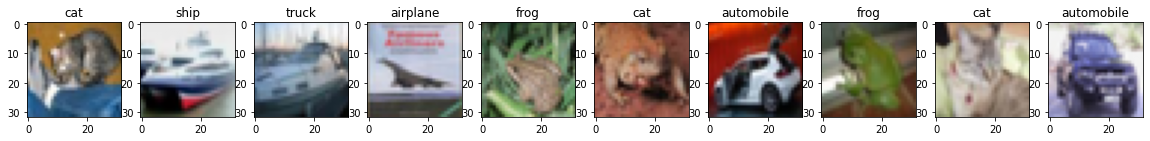

In [20]:
import random
y_predicted = model_J.predict(X_test_entire)
# This creates a prediction vector.It is 10000 by 10. 
# For each row(example) I want the index which is the argmax
# So i need to loop. I will display 10 predictions since some of them should be wrong. 

y_predicted_cat=np.zeros(10000)

y_predicted_cat = np.asarray(y_predicted_cat)
y_predicted_cat = y_predicted_cat.astype('str')

for i in range(0,10000):
  predicted_number = np.argmax(y_predicted[i])
  y_predicted_cat[i] = classifications_dict[predicted_number]


fig,ax = plt.subplots(1,10,figsize=(20,20))
for i in range(0,10):
  img = X_test_entire[i]
  predicted_class_label = y_predicted_cat[i]
  ax[i].imshow(img)
  ax[i].set_title(predicted_class_label)

plt.show()



Seems as if the model needs Green to predict a frog. 

Adding the plots of all the training and validation accuracies for each model I did. A-P and Z. Comparing the training and test accuracies. 

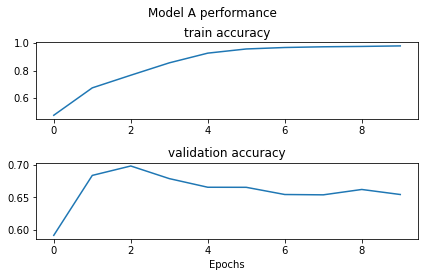

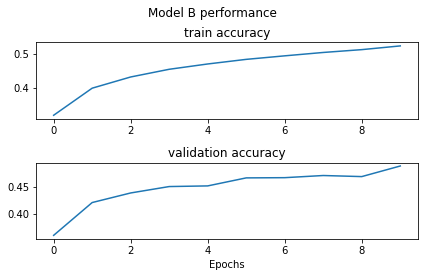

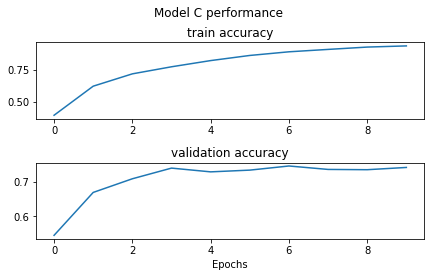

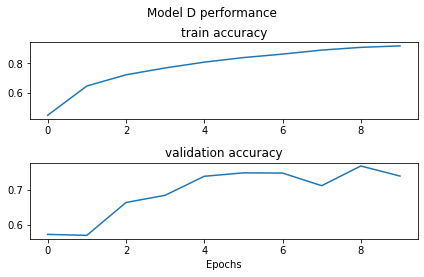

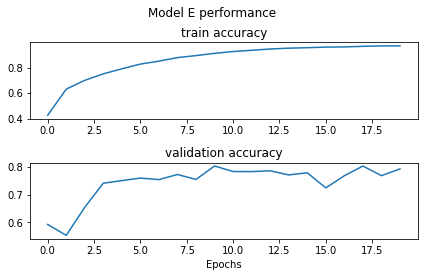

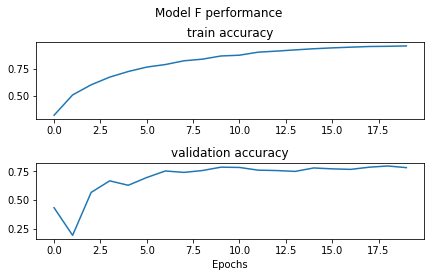

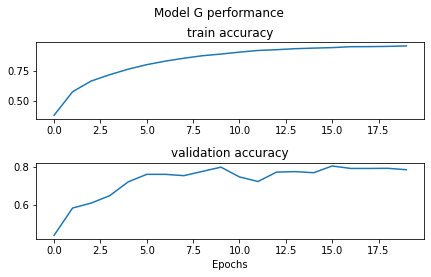

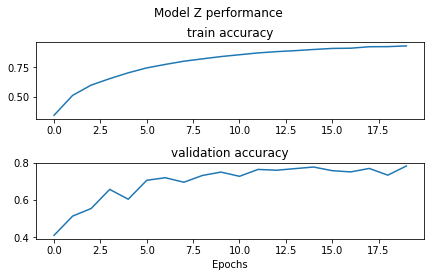

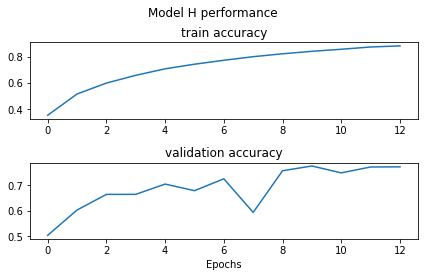

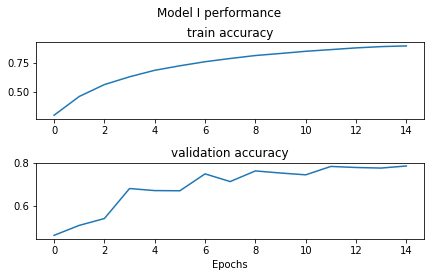

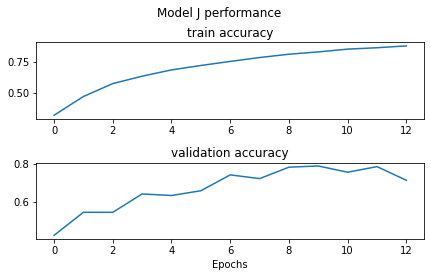

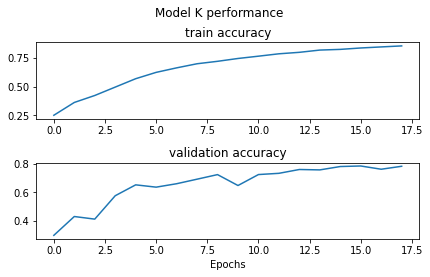

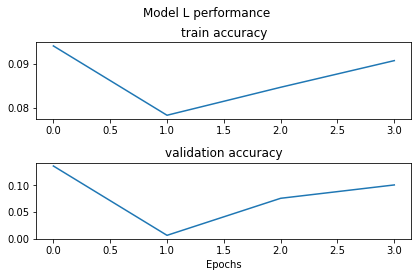

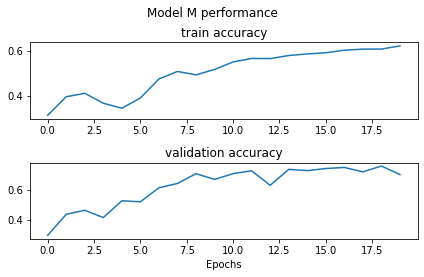

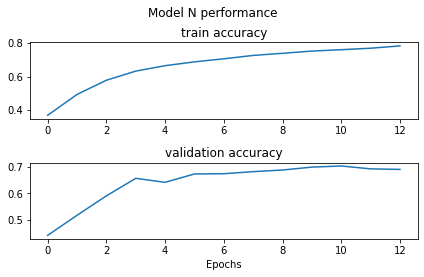

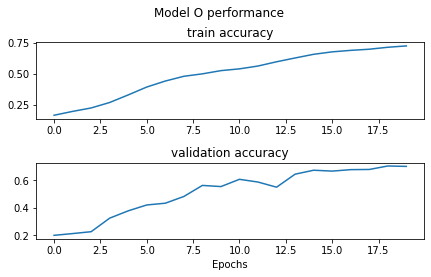

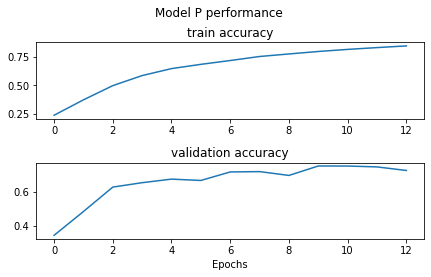

In [ ]:
fig_A, (ax1_A, ax2_A) = plt.subplots(2)
fig_A.suptitle('Model A performance')
ax1_A.plot( history_A.history['accuracy'])
ax1_A.set_title('train accuracy')
ax2_A.plot( history_A.history['val_accuracy'])
ax2_A.set_title('validation accuracy')
ax2_A.set_xlabel("Epochs")
fig_A.tight_layout(rect=[0, 0.03, 1, 0.95])

fig_B, (ax1_B, ax2_B) = plt.subplots(2)
fig_B.suptitle('Model B performance')
ax1_B.plot( history_B.history['accuracy'])
ax1_B.set_title('train accuracy')
ax2_B.plot( history_B.history['val_accuracy'])
ax2_B.set_title('validation accuracy')
ax2_B.set_xlabel("Epochs")
fig_B.tight_layout(rect=[0, 0.03, 1, 0.95])

fig_C, (ax1_C, ax2_C) = plt.subplots(2)
fig_C.suptitle('Model C performance')
ax1_C.plot( history_C.history['accuracy'])
ax1_C.set_title('train accuracy')
ax2_C.plot( history_C.history['val_accuracy'])
ax2_C.set_title('validation accuracy')
ax2_C.set_xlabel("Epochs")
fig_C.tight_layout(rect=[0, 0.03, 1, 0.95])

fig_D, (ax1_D, ax2_D) = plt.subplots(2)
fig_D.suptitle('Model D performance')
ax1_D.plot( history_D.history['accuracy'])
ax1_D.set_title('train accuracy')
ax2_D.plot( history_D.history['val_accuracy'])
ax2_D.set_title('validation accuracy')
ax2_D.set_xlabel("Epochs")
fig_D.tight_layout(rect=[0, 0.03, 1, 0.95])


fig_E, (ax1_E, ax2_E) = plt.subplots(2)
fig_E.suptitle('Model E performance')
ax1_E.plot( history_E.history['accuracy'])
ax1_E.set_title('train accuracy')
ax2_E.plot( history_E.history['val_accuracy'])
ax2_E.set_title('validation accuracy')
ax2_E.set_xlabel("Epochs")
fig_E.tight_layout(rect=[0, 0.03, 1, 0.95])


fig_F, (ax1_F, ax2_F) = plt.subplots(2)
fig_F.suptitle('Model F performance')
ax1_F.plot( history_F.history['accuracy'])
ax1_F.set_title('train accuracy')
ax2_F.plot( history_F.history['val_accuracy'])
ax2_F.set_title('validation accuracy')
ax2_F.set_xlabel("Epochs")
fig_F.tight_layout(rect=[0, 0.03, 1, 0.95])

fig_G, (ax1_G, ax2_G) = plt.subplots(2)
fig_G.suptitle('Model G performance')
ax1_G.plot( history_G.history['accuracy'])
ax1_G.set_title('train accuracy')
ax2_G.plot( history_G.history['val_accuracy'])
ax2_G.set_title('validation accuracy')
ax2_G.set_xlabel("Epochs")
fig_G.tight_layout(rect=[0, 0.03, 1, 0.95])

fig_Z, (ax1_Z, ax2_Z) = plt.subplots(2)
fig_Z.suptitle('Model Z performance')
ax1_Z.plot( history_Z.history['accuracy'])
ax1_Z.set_title('train accuracy')
ax2_Z.plot( history_Z.history['val_accuracy'])
ax2_Z.set_title('validation accuracy')
ax2_Z.set_xlabel("Epochs")
fig_Z.tight_layout(rect=[0, 0.03, 1, 0.95])

fig_H, (ax1_H, ax2_H) = plt.subplots(2)
fig_H.suptitle('Model H performance')
ax1_H.plot( history_.history['accuracy'])
ax1_H.set_title('train accuracy')
ax2_H.plot( history_.history['val_accuracy'])
ax2_H.set_title('validation accuracy')
ax2_H.set_xlabel("Epochs")
fig_H.tight_layout(rect=[0, 0.03, 1, 0.95])

fig_I, (ax1_I, ax2_I) = plt.subplots(2)
fig_I.suptitle('Model I performance')
ax1_I.plot( history_I.history['accuracy'])
ax1_I.set_title('train accuracy')
ax2_I.plot( history_I.history['val_accuracy'])
ax2_I.set_title('validation accuracy')
ax2_I.set_xlabel("Epochs")
fig_I.tight_layout(rect=[0, 0.03, 1, 0.95])

fig_J, (ax1_J, ax2_J) = plt.subplots(2)
fig_J.suptitle('Model J performance')
ax1_J.plot( history_J.history['accuracy'])
ax1_J.set_title('train accuracy')
ax2_J.plot( history_J.history['val_accuracy'])
ax2_J.set_title('validation accuracy')
ax2_J.set_xlabel("Epochs")
fig_J.tight_layout(rect=[0, 0.03, 1, 0.95])

fig_K, (ax1_K, ax2_K) = plt.subplots(2)
fig_K.suptitle('Model K performance')
ax1_K.plot( history_K.history['accuracy'])
ax1_K.set_title('train accuracy')
ax2_K.plot( history_K.history['val_accuracy'])
ax2_K.set_title('validation accuracy')
ax2_K.set_xlabel("Epochs")
fig_K.tight_layout(rect=[0, 0.03, 1, 0.95])

fig_L, (ax1_L, ax2_L) = plt.subplots(2)
fig_L.suptitle('Model L performance')
ax1_L.plot( history_L.history['accuracy'])
ax1_L.set_title('train accuracy')
ax2_L.plot( history_L.history['val_accuracy'])
ax2_L.set_title('validation accuracy')
ax2_L.set_xlabel("Epochs")
fig_L.tight_layout(rect=[0, 0.03, 1, 0.95])

fig_M, (ax1_M, ax2_M) = plt.subplots(2)
fig_M.suptitle('Model M performance')
ax1_M.plot( history_M.history['accuracy'])
ax1_M.set_title('train accuracy')
ax2_M.plot( history_M.history['val_accuracy'])
ax2_M.set_title('validation accuracy')
ax2_M.set_xlabel("Epochs")
fig_M.tight_layout(rect=[0, 0.03, 1, 0.95])

fig_N, (ax1_N, ax2_N) = plt.subplots(2)
fig_N.suptitle('Model N performance')
ax1_N.plot( history_N.history['accuracy'])
ax1_N.set_title('train accuracy')
ax2_N.plot( history_N.history['val_accuracy'])
ax2_N.set_title('validation accuracy')
ax2_N.set_xlabel("Epochs")
fig_N.tight_layout(rect=[0, 0.03, 1, 0.95])

fig_O, (ax1_O, ax2_O) = plt.subplots(2)
fig_O.suptitle('Model O performance')
ax1_O.plot( history_O.history['accuracy'])
ax1_O.set_title('train accuracy')
ax2_O.plot( history_O.history['val_accuracy'])
ax2_O.set_title('validation accuracy')
ax2_O.set_xlabel("Epochs")
fig_O.tight_layout(rect=[0, 0.03, 1, 0.95])

fig_P, (ax1_P, ax2_P) = plt.subplots(2)
fig_P.suptitle('Model P performance')
ax1_P.plot( history_P.history['accuracy'])
ax1_P.set_title('train accuracy')
ax2_P.plot( history_P.history['val_accuracy'])
ax2_P.set_title('validation accuracy')
ax2_P.set_xlabel("Epochs")
fig_P.tight_layout(rect=[0, 0.03, 1, 0.95])



FOR FINAL REPORT EXPERIMENT SECTION. ONLY INCLUDE FIGURES OF VERY IMPORTANT MODELS. LIKE THE BEST MODEL. Briefly describe what the experiment did and how it affected the model performance. 


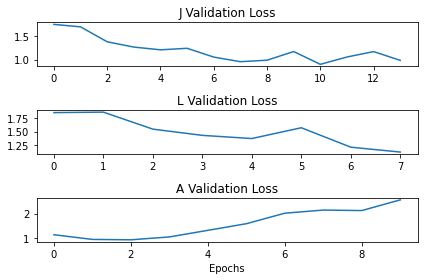

In [32]:
fig_, (ax1, ax2,ax3) = plt.subplots(3)

ax1.plot( history_J.history['val_loss'])
ax1.set_title('J Validation Loss')
ax2.plot( history_L.history['val_loss'])
ax2.set_title('L Validation Loss')
ax3.plot(history_A.history['val_loss'])
ax3.set_title('A Validation Loss')
ax3.set_xlabel("Epochs")
fig_.tight_layout()






In [36]:
from google.colab import drive
drive.mount('/content/gdrive')

model_J.save('/content/gdrive/MyDrive/MachineLearningCW')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/MachineLearningCW/assets
